# CAPM

## Frontera eficiente sin activo libre de riesgo

In [1]:
import math
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style("whitegrid")

In [3]:
filename="https://raw.githubusercontent.com/alfonso-santos/Python-aplicado-gestion-carteras/fernando/Tema_2/data/tr_eikon_eod_data.csv"
raw = pd.read_csv(filename,index_col=0, parse_dates=True)
raw.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


In [4]:
symbols = ['SPY', 'GLD', 'AAPL.O', 'MSFT.O']
data = (pd.DataFrame(raw[symbols]).dropna())
print(data)

               SPY     GLD      AAPL.O  MSFT.O
Date                                          
2010-01-04  113.33  109.80   30.572827  30.950
2010-01-05  113.63  109.70   30.625684  30.960
2010-01-06  113.71  111.51   30.138541  30.770
2010-01-07  114.19  110.82   30.082827  30.452
2010-01-08  114.57  111.37   30.282827  30.660
...            ...     ...         ...     ...
2018-06-25  271.00  119.89  182.170000  98.390
2018-06-26  271.60  119.26  184.430000  99.080
2018-06-27  269.35  118.58  184.160000  97.540
2018-06-28  270.89  118.22  185.500000  98.630
2018-06-29  271.28  118.65  185.110000  98.610

[2138 rows x 4 columns]


In [5]:
rets = np.log(data / data.shift(1))

In [6]:
noa = len(symbols)
print(noa)

4


In [8]:
weights = np.random.random(noa)
print(weights)

[0.73091109 0.42790764 0.80774372 0.64690911]


In [9]:
weights /= np.sum(weights)
print(weights)

[0.27967057 0.16373151 0.30906926 0.24752866]


In [10]:
def port_ret(weights):
    return np.dot(rets.mean().T *252, weights)

In [11]:
def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

In [12]:
prets = []
pvols = []

In [13]:
for p in range (2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(port_ret(weights))
    pvols.append(port_vol(weights))

In [14]:
prets = np.array(prets)
pvols = np.array(pvols)

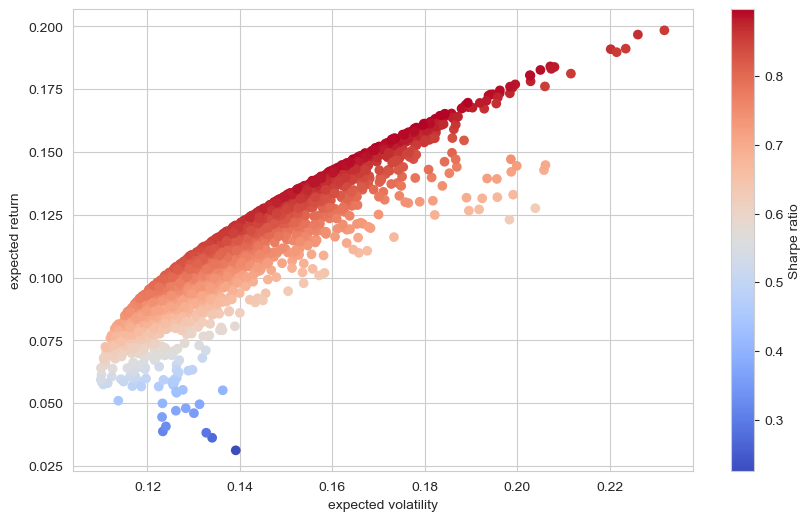

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols, marker='o', cmap='coolwarm')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [16]:
import scipy.optimize as sco

In [17]:
def min_func_sharpe(weights):
    return -port_ret(weights) / port_vol(weights)

In [18]:
bnds = tuple((0, 1) for x in range(noa))
bnds

((0, 1), (0, 1), (0, 1), (0, 1))

In [19]:
cons = ({'type': 'eq', 'fun': lambda x:np.sum(x) - 1})
cons

{'type': 'eq', 'fun': <function __main__.<lambda>(x)>}

In [20]:
bnds = tuple((0, 1) for x in range(noa))
cons = ({'type': 'eq', 'fun': lambda x:np.sum(x) - 1})
eweights = np.array(noa * [1. / noa,])
eweights

array([0.25, 0.25, 0.25, 0.25])

In [21]:
min_func_sharpe(eweights)

-0.8436203363155396

In [22]:
opts = sco.minimize(min_func_sharpe, eweights, method='SLSQP', bounds=bnds, constraints=cons)
opts

     fun: -0.8976673894053063
     jac: array([-2.45973468e-04,  1.92895532e-05,  8.96751881e-05,  8.30367208e-05])
 message: 'Optimization terminated successfully'
    nfev: 30
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.25454108, 0.04228125, 0.51191355, 0.19126412])

In [23]:
opts['x'].round(3)

array([0.255, 0.042, 0.512, 0.191])

In [24]:
port_ret(opts['x']).round(3)

0.161

In [25]:
port_vol(opts['x']).round(3)

0.18

In [26]:
port_ret(opts['x']) / port_vol(opts['x'])

0.8976673894053063

In [28]:
optv = sco.minimize(port_vol, eweights, method='SLSQP', bounds=bnds, constraints=cons)
optv

     fun: 0.10942155263468747
     jac: array([0.10939826, 0.10944918, 0.11098003, 0.10948556])
 message: 'Optimization terminated successfully'
    nfev: 45
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([5.43263071e-01, 4.55675216e-01, 2.16840434e-19, 1.06171257e-03])

In [29]:
optv['x'].round(3)

array([0.543, 0.456, 0.   , 0.001])

In [30]:
port_ret(optv['x']).round(3)

0.06

In [31]:
port_vol(optv['x']).round(3)

0.109

In [32]:
port_ret(optv['x']) / port_vol(optv['x'])

0.5504173651830081

In [33]:
cons = ({'type': 'eq', 'fun': lambda x:  port_ret(x) - tret},
                 {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple((0, 1) for x in range(noa))

In [34]:
tuple((0, 1) for x in weights)

((0, 1), (0, 1), (0, 1), (0, 1))

In [35]:
trets = np.linspace(0.05, 0.2, 50)
tvols = []
for tret in trets:
    res = sco.minimize(port_vol, eweights, method='SLSQP',bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

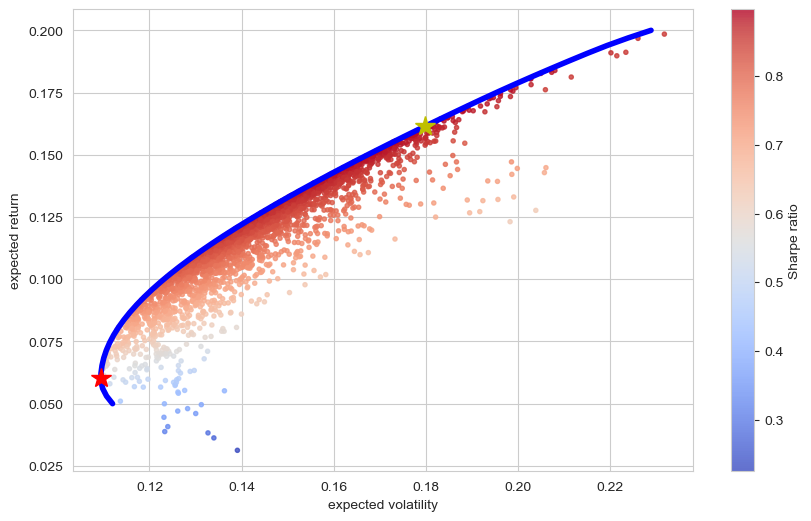

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols, marker='.', alpha=0.8, cmap='coolwarm')
plt.plot(tvols, trets, 'b', lw=4.0)
plt.plot(port_vol(opts['x']), port_ret(opts['x']),'y*', markersize=15.0)
plt.plot(port_vol(optv['x']), port_ret(optv['x']),'r*', markersize=15.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

# Linea del mercado de capitales. CAPM

Analizamos la estructura de la frontera eficiente cuando introducimos el activo lbre de riesgo. Para ello, planteamos el problema formalmente:
$$\begin{gather}
max \text{   } w_0r_f+\mu^T-\frac{\lambda}{2}w^T\Sigma w \tag{1}\\
s.t. \text{   } w_0+i^Tw=1 \nonumber
\end{gather}$$

puede reescribirse como un problema sin restricciones eliminando $w_0$
$$max \text{   } w^T\pi -\frac{\lambda}{2}w^T\Sigma \tag{2}w$$

donde $\pi=\mu-R_f$ es el vector de la prima por riesgo. Aplicamos la condición de primer orden:
$$\pi-\lambda\Sigma w=0 \tag{3}$$

Resolviendo obtenemos las ponderaciones una cartera mixta eficiente:




In [ ]:
import scipy.interpolate as sci

'ind = np.argmin(tvols)' identifica dónde esta el valor mínimo de la lista de desviaciones estandars. Es decir, el tercer valor es el mínimo.

In [ ]:
ind = np.argmin(tvols)
print(ind)

3


`evols = tvols[ind:]` selecciono todas las volatilidades a partir de la cartera óptima de mínima varianza.
`erets = trets[ind:]` selecciono todas las rentabilidades a partir de la cartera óptima de mínima varianza.



In [ ]:
evols = tvols[ind:]
erets = trets[ind:]
print()
print(erets evols)

[0.05918367 0.0622449  0.06530612 0.06836735 0.07142857 0.0744898
 0.07755102 0.08061224 0.08367347 0.08673469 0.08979592 0.09285714
 0.09591837 0.09897959 0.10204082 0.10510204 0.10816327 0.11122449
 0.11428571 0.11734694 0.12040816 0.12346939 0.12653061 0.12959184
 0.13265306 0.13571429 0.13877551 0.14183673 0.14489796 0.14795918
 0.15102041 0.15408163 0.15714286 0.16020408 0.16326531 0.16632653
 0.16938776 0.17244898 0.1755102  0.17857143 0.18163265 0.18469388
 0.1877551  0.19081633 0.19387755 0.19693878 0.2       ] [0.10944758 0.10947297 0.10969286 0.11008001 0.11063305 0.11134938
 0.11222585 0.11325876 0.11444387 0.1157765  0.11725162 0.11886393
 0.12060837 0.12247811 0.12446845 0.12657361 0.12878784 0.13110569
 0.13352186 0.13603043 0.13862715 0.14130693 0.14406512 0.1468973
 0.14979927 0.15276706 0.1557969  0.15888524 0.1620288  0.16522477
 0.16846903 0.17175966 0.17509422 0.17846999 0.18188458 0.18533589
 0.18882214 0.19234281 0.19593905 0.19962547 0.20339717 0.20724919
 0.2111

El código `tck = sci.splrep(evols, erets)` se utiliza para realizar una interpolación de splines cúbicos en una serie de datos bidimensionales representados por las listas `evols` y `erets`.

- `sci.splrep`: Esta es una función del módulo scipy.interpolate que se utiliza para calcular los coeficientes de una interpolación de splines cúbicos. Los splines cúbicos son funciones suaves que se utilizan comúnmente para interpolar datos en dos dimensiones.

En resumen, `tck` representa una interpolación de splines cúbicos de los datos contenidos en evols y erets, lo que permite obtener una representación suave de la relación entre las variables x e y en esos datos.

In [ ]:
tck = sci.splrep(evols, erets)
tck

(array([0.10944758, 0.10944758, 0.10944758, 0.10944758, 0.10969286,
        0.11008001, 0.11063305, 0.11134938, 0.11222585, 0.11325876,
        0.11444387, 0.1157765 , 0.11725162, 0.11886393, 0.12060837,
        0.12247811, 0.12446845, 0.12657361, 0.12878784, 0.13110569,
        0.13352186, 0.13603043, 0.13862715, 0.14130693, 0.14406512,
        0.1468973 , 0.14979927, 0.15276706, 0.1557969 , 0.15888524,
        0.1620288 , 0.16522477, 0.16846903, 0.17175966, 0.17509422,
        0.17846999, 0.18188458, 0.18533589, 0.18882214, 0.19234281,
        0.19593905, 0.19962547, 0.20339717, 0.20724919, 0.21117744,
        0.21517764, 0.21935776, 0.22892911, 0.22892911, 0.22892911,
        0.22892911]),
 array([0.05918367, 0.07054273, 0.06082627, 0.07127788, 0.07083661,
        0.07514943, 0.07767382, 0.08086119, 0.08383801, 0.08689314,
        0.08992981, 0.09297762, 0.0960237 , 0.09907511, 0.1021263 ,
        0.10517914, 0.10823306, 0.111288  , 0.11434291, 0.11739981,
        0.12045623, 0.1235

La función `f(x)` que has definido utiliza la interpolación de splines cúbicos que fue calculada previamente en la variable `tck`:
- `def f(x)`: Esto define una función llamada f que toma un argumento x.
- `return sci.splev(x, tck, der=0)`: Dentro de la función, se utiliza `sci.splev` para evaluar la spline cúbica en un valor de `x` dado y devolver el valor interpolado correspondiente en `y`.
-`x`: Es el valor en el eje x en el que deseas evaluar la spline cúbica.
- `tck`: Es la tupla de coeficientes que representa la spline cúbica calculada previamente a partir de tus datos de entrada (evols y erets) utilizando sci.splrep.
- `der=0`: El argumento `der` se utiliza para especificar el orden de la derivada que deseas calcular. En este caso, `der=0` significa que se calcula el valor de la función original (sin derivar).

Entonces, cuando llames a esta función f(x) con un valor de x, obtendrás el valor interpolado correspondiente en y basado en la spline cúbica definida por tck. Esto te permite obtener valores interpolados suaves en función de x a partir de tus datos originales.

Con la función `df(x)` obtendremos los valores de la derivada.

In [ ]:
def f(x):
    return sci.splev(x, tck, der=0)
def df(x):
    return sci.splev(x, tck, der=1)

Las condiciones de la línea del mercado de capitales son:

$$\begin{align}
t(x)&=a+bx \\
t(0)&=r_f &\Leftrightarrow a&=r_f \\
t(x)&=f(x) &\Leftrightarrow a+bx&=f(x) \\
t'(x)&=f'(x) &\Leftrightarrow b&=f'(x)
\end{align}$$

$$p=(a,b,x)$$

In [ ]:
def equations(p, rf=0.01):
    eq1 = rf - p[0]
    eq2 = rf + p[1] * p[2] - f(p[2])
    eq3 = p[1] - df(p[2])
    return eq1, eq2, eq3

In [ ]:
opt = sco.fsolve(equations, [0.01, 0.5, 0.15])

In [ ]:
opt

array([0.01      , 0.84470952, 0.19525392])

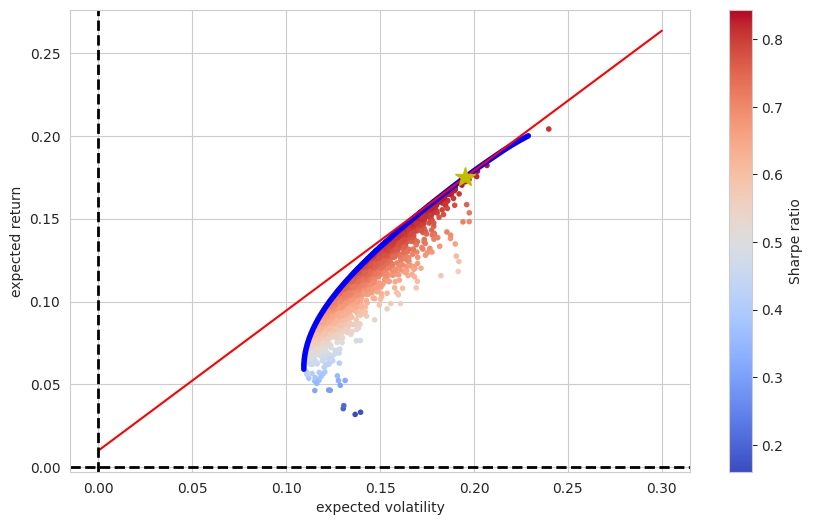

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=(prets - 0.01) / pvols,marker='.', cmap='coolwarm')
plt.plot(evols, erets, 'b', lw=4.0)
cx = np.linspace(0.0, 0.3) # por defecto genera 50 valores
plt.plot(cx, opt[0] + opt[1] * cx, 'r', lw=1.5)
plt.plot(opt[2], f(opt[2]), 'y*', markersize=15.0)
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')